In [1]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('models/AAPL_model.h5')

In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from dotenv import load_dotenv, dotenv_values
import os

load_dotenv(override=True)  # take environment variables from .env file

API_KEY = os.getenv('API_KEY')
symbol = 'AAPL'


In [8]:
from utils import *

In [11]:
data = fetch_stock_data( symbol, API_KEY)

In [12]:
data

,timestamp,open,high,low,close,volume
0,1999-11-01,80.000,80.690,77.37,77.62,2487300
1,1999-11-02,78.000,81.690,77.31,80.25,3564600
2,1999-11-03,81.620,83.250,81.00,81.50,2932700
3,1999-11-04,82.060,85.370,80.62,83.62,3384700
4,1999-11-05,84.620,88.370,84.00,88.31,3721500
...,...,...,...,...,...,...
6472,2025-07-28,214.030,214.845,213.06,214.05,37858017
6473,2025-07-29,214.175,214.810,210.82,211.27,51411723
6474,2025-07-30,211.895,212.390,207.72,209.05,45512514
6475,2025-07-31,208.490,209.840,207.16,207.57,80698431


In [13]:
data1 = preprocess_data(data)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1.reshape(-1, 1))


train_data, test_data, training_size, test_size = split_data(scaled_data)

# Create datasets for training/testing
X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [14]:

test_predict=model.predict(X_test)
y_predicted = scaler.inverse_transform(test_predict)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # ytest is your true test labels


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


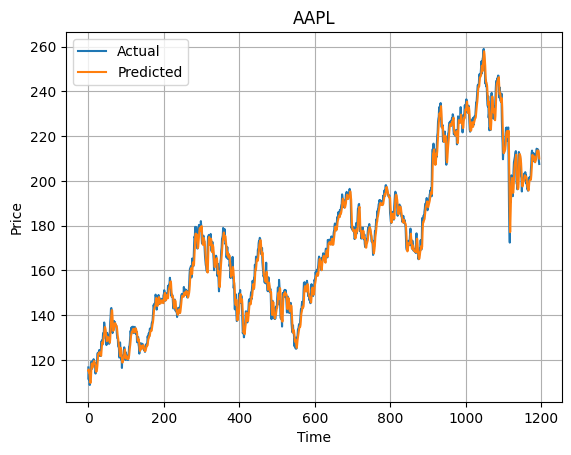

In [15]:
plt.title(symbol)
plt.plot(y_actual, label='Actual')
plt.plot(y_predicted, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
accuracy = 100 - mape

print(f"MAPE {symbol}:  {mape:.2f}%")
print(f"Accuracy (approx) {symbol}: {accuracy:.2f}%")

MAPE TSLA:  4.68%
Accuracy (approx) TSLA: 95.32%


In [3]:
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
accuracy = 100 - mape

print(f"MAPE {symbol}:  {mape:.2f}%")
print(f"Accuracy (approx) {symbol}: {accuracy:.2f}%")

NameError: name 'np' is not defined